In [27]:
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
import time

In [3]:
def setting_data(data=None):
    feature_matrix = np.ones((np.ma.size(data,axis=0),np.ma.size(data,axis=1)+1))
    feature_matrix[:,1:] = data
    return feature_matrix

In [4]:
def predict_values(feature_matrix=None, weights=None):
    return np.dot(a=feature_matrix,b=weights)

In [5]:
def plynomial_features_generation(data=None, degree=0):
    return np.hstack((data,np.power(data,np.arange(start=2,stop=degree+1))))

In [6]:
def normalize_data(data=None):
    data = data.astype(float)
    for i in range(data.shape[1]):
        data[:,i] = np.divide(np.subtract(data[:,i],np.mean(data[:,i])), np.std(data[:,i])).astype(float)
    return data

In [37]:
def gradient_descent(x=None,y=None,tolerance_gradient=0.01, tolerance_cost=0.0000001,
                     step_size = 0.001, max_iter=10000):
    
    feature_matrix = setting_data(data=x)
    
    weights = np.random.rand(x.shape[1] + 1, 1)
    partials = np.zeros(x.shape[1]+1).reshape((-1,1))
    
    i = 0
    prev_cost = 10
    costs = np.array([])
    gradients = np.array([])
    
    converged = False
    while not converged:
        i += 1
        
        predicted = predict_values(feature_matrix=feature_matrix, weights=weights)
        errors = np.subtract(predicted, y)
        #Updating weights
        
        #taking derivative
        partials = np.dot(feature_matrix.T,errors)
        weights = np.subtract(weights,np.multiply(step_size,partials))
        
        gradient_magnitude = np.sqrt(np.sum(np.square(partials)))
        cur_cost = np.sum(np.square(errors))
        
        gradients = np.append(gradients,gradient_magnitude)
        costs = np.append(costs,cur_cost)
#         if i%1000==0:
#             print(cur_cost)
#         print(abs(cur_cost - prev_cost))
        if (gradient_magnitude <= tolerance_gradient) or (abs(cur_cost - prev_cost) < tolerance_cost):
            if gradient_magnitude <= tolerance_gradient:
                print('[Gradient Magnitude - Tolerance] Satisfied')
            else:
                print('[Cost Tolerance - Precision] Satisfied')
            converged = True

        if i >= max_iter:
            print('Iterations Completed')
            converged = True
        
        prev_cost = cur_cost
    return (i, weights,gradients, costs)

###### Generating Data

###### Conventions

x      = normal data (1D vector)

x_poly = dataset with specified polynomials appended as columns (Specify by Degree)

y_poly = Y generated from x_poly

x_norm = x_poly normalized

y_norm = y generated from x_norm

In [8]:
x = np.arange(-10, 11).reshape(-1,1)

Generating Polynomial Features

In [12]:
degree = 2
x_poly = plynomial_features_generation(x,degree)

Generating **Y** from plynomials of X

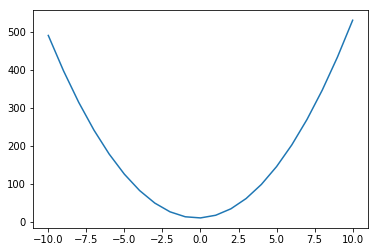

In [79]:
y_poly = (10 + 2*x_poly[:,0] + 5*x_poly[:,1]).astype(float).reshape(-1,1)
plt.plot(x[:,0], y)
plt.show()

Normalizing Data

In [86]:
x_norm = normalize_data(x_poly)
y_norm = (10 + 2*x_norm[:,0] + 5*x_norm[:,1]**2).reshape(-1,1)

###### Running with No normalization

In [112]:
start_time = time.time()
i,cal_weights, grads, costs = gradient_descent(x=x_poly, y=y_poly,step_size=1e-5,tolerance_cost=1e-7,
                                               tolerance_gradient=1e-7, max_iter=1e7)
end_time = time.time()

[Cost Tolerance - Precision] Satisfied


In [113]:
print('Time taken: ',end_time-start_time)
print('Iterations: ',i)
print('Calculated weights:\n',cal_weights)

Time taken:  6.5473313331604
Iterations:  76505
Calculated weights:
 [[9.99239545]
 [2.        ]
 [5.00011559]]


Orignal weights were: 10    2    5

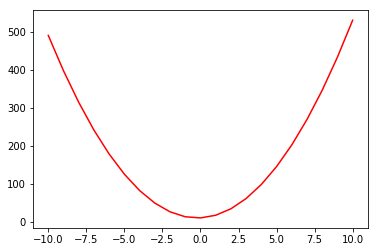

In [114]:
predicted_target = (cal_weights[0] + cal_weights[1]*x_poly[:,0] + cal_weights[2]*(x_poly[:,1])).reshape(-1,1)
plt.plot(x_poly[:,0], y,'r')
plt.show()

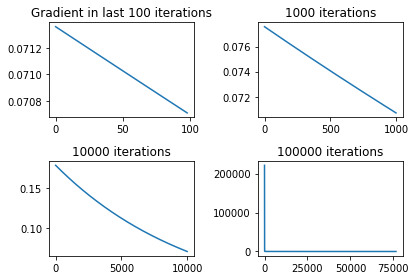

In [115]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(np.arange(len(grads[-100:-1])), grads[-100:-1])
axes[0,0].set_title('Gradient in last 100 iterations')
axes[0, 1].plot(np.arange(len(grads[-1000:-1])), grads[-1000:-1])
axes[0,1].set_title('1000 iterations')
axes[1, 0].plot(np.arange(len(grads[-10000:-1])), grads[-10000:-1])
axes[1,0].set_title('10000 iterations')
axes[1, 1].plot(np.arange(len(grads[-100000:-1])), grads[-100000:-1])
axes[1,1].set_title('100000 iterations')
plt.tight_layout()
plt.show()

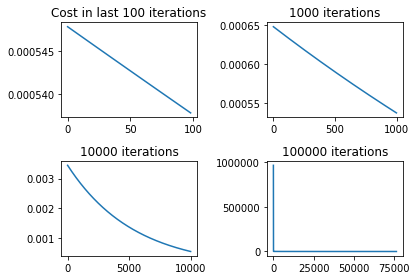

In [116]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(np.arange(len(costs[-100:-1])), costs[-100:-1])
axes[0, 0].set_title('Cost in last 100 iterations')
axes[0, 1].plot(np.arange(len(costs[-1000:-1])), costs[-1000:-1])
axes[0, 1].set_title('1000 iterations')
axes[1, 0].plot(np.arange(len(costs[-10000:-1])), costs[-10000:-1])
axes[1, 0].set_title('10000 iterations')
axes[1, 1].plot(np.arange(len(costs[-100000:-1])), costs[-100000:-1])
axes[1, 1].set_title('100000 iterations')
plt.tight_layout()
plt.show()

###### Running with Nomalization

In [101]:
start_time = time.time()
i,cal_weights, grads, costs = gradient_descent(x=x_norm, y=y_norm,step_size=1e-5,tolerance_cost=1e-80,
                                               tolerance_gradient=1e-7, max_iter=1e7)
end_time = time.time()

[Cost Tolerance - Precision] Satisfied


In [102]:
print('Time taken: ',end_time-start_time)
print('Iterations: ',i)
print('Calculated weights:\n',cal_weights)

Time taken:  5.776257276535034
Iterations:  70263
Calculated weights:
 [[14.99999452]
 [ 1.99999928]
 [ 3.09605503]]


Orignal weights were 10 2 5

In [ ]:
70109